## 1. 신경망
가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력을 의미한다.
### 그림으로 보는 신경망 구조
신경망을 그림으로 나타낼 경우 가장 왼쪽 줄을 입력층, 맨 오른쪽 줄을 출력층, 중간 줄을 은닉층이라고 한다.

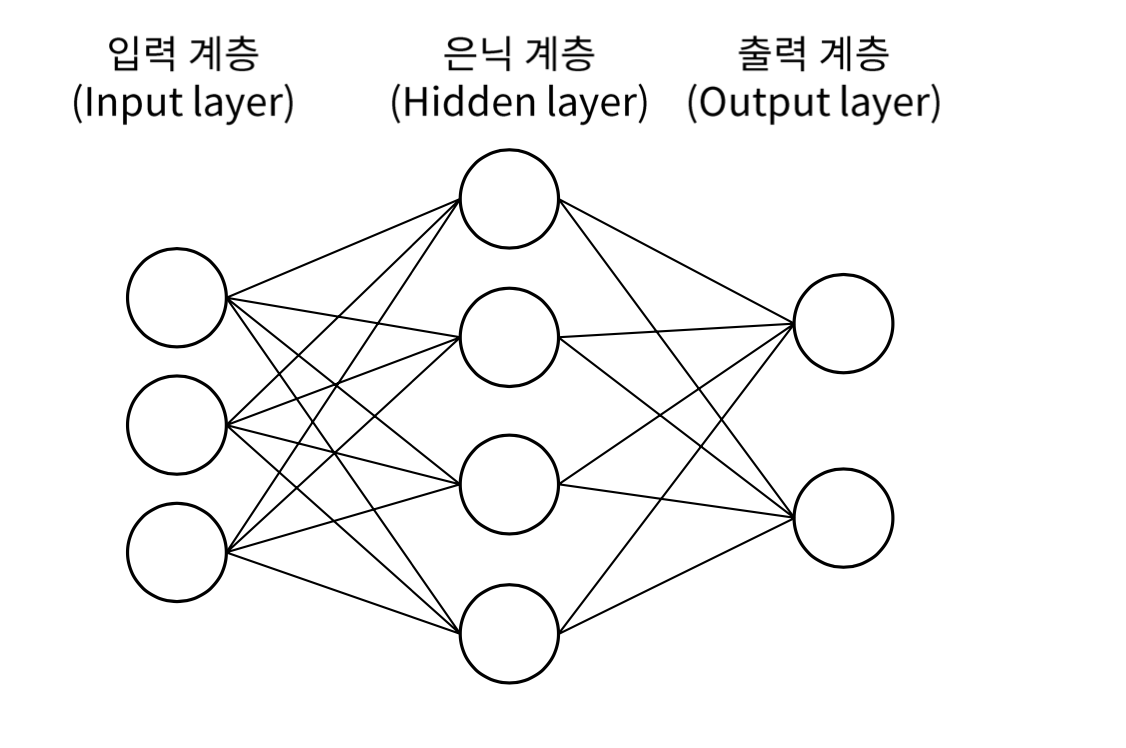

### 퍼셉트론에서 신경망으로 확장하기
앞의 퍼셉트론 챕터에서 ${w_1}$, ${w_2}$ 두 신호를 입력받아 y를 출력하는 것을 보았었다. 여기서 편향을 명시하는 b를 추가하게 된다면 다음과 같은 그림이 나오게 된다.


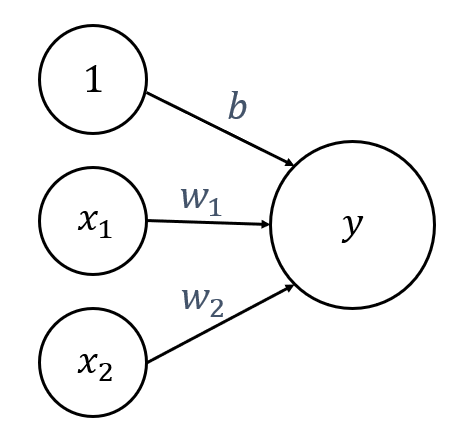

그리고 식으로 표현하게 되면 다음과 같이 표현된다.

식1
${y = h(b + w_1x_1 + w_2x_2)}$ \

식2
${h(x) = }$${0(x\le 0) \brace 1(x> 0)}$

### 활성화 함수의 등장
활성화 함수: 입력 신호의 총합을 출력 신호로 변환하는 함수.
식을 풀어서 써보자면 가줓치가 곱해진 입력 신호의 총합을 계산해서 그 합을 활성화 함수에 입력해 결과를 내는 2단계로 처리된다.

${a = b + w_1x_1 + w_2x_2}$ \
${y = h(a)}$

이를 그림으로 보게 되면 다음과 같이 그려진다.


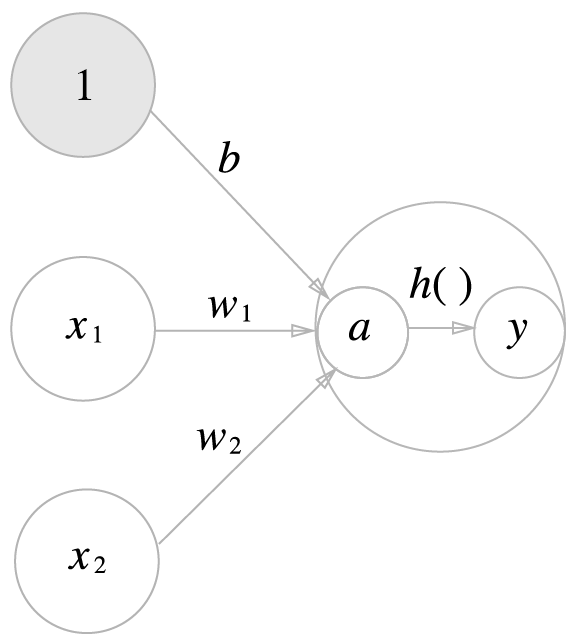

## 2. 활성화 함수
### 시그모이드 함수
신경망에서는 활성화 함수로 시그모이드  함수를 이용하여 신호를 변환하고 그 변환된 신호를 다음 뉴런에 전달한다. 식은 아래와 같다.\
${h(x) = \frac{1}{1+exp(-x)}}$


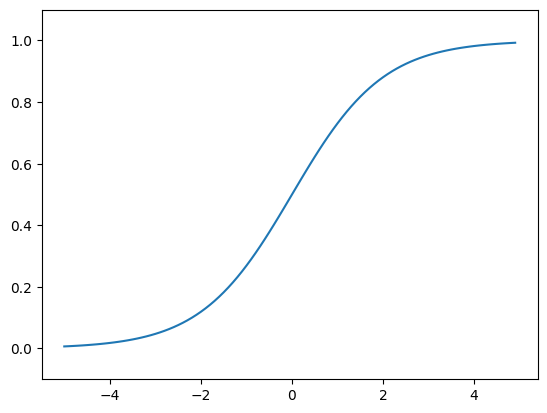

In [3]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.arange(-5.0, 5.0 , 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 계단함수 구현

<ipython-input-2-60b257bad5cc>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int)


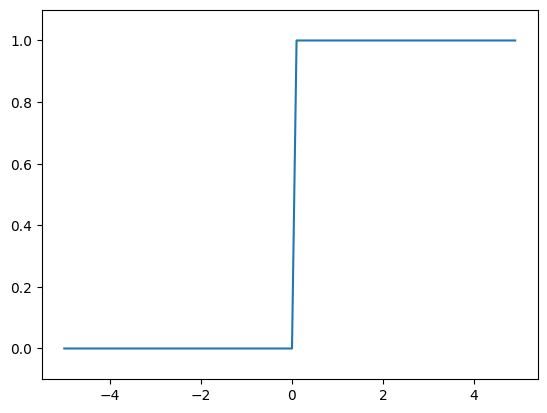

In [2]:
import numpy as np
import matplotlib.pylab as plt
def step_function(x):
  return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 비선형 함수
계단 함수와 시그모이드 함수는 비선형 함수라는 것이다. 곡선, 그리고 구부러진 직선으로 나타내기 때문이다. 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 선형 함수로 할 경우 신경망의 층을 깊게 하는 의미가 없어지기 때ㅑ문에 층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 한다.

### ReLU 함수
최근에 활성화 함수로서 시그모이드 함수보다 많이 쓰이는 함수이다. 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다. 수식은 다음과 같다. \
${h(x) = }$${x(x>0) \brace 0(x\le0)}$

코드로 구현하면 다음과 같이 나오게 된다.

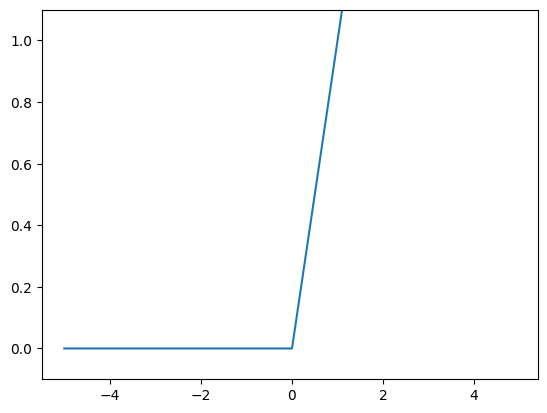

In [4]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3. 다차원 배열에서의 계산
### 행렬의 곱

In [5]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

행렬의 형상이 행렬 A의 1번째 차원의 원소 수(열 수)와 행렬 B의 0번째 차원의 원소 수(행 수)가 같은 경우에도 가능

In [6]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])

np.dot(A, B)

array([[22, 28],
       [49, 64]])

### 신경망에서의 행렬 곱
아래 그림은 편향과 활성화 함수를 생략하고 가중치만 갖는다.


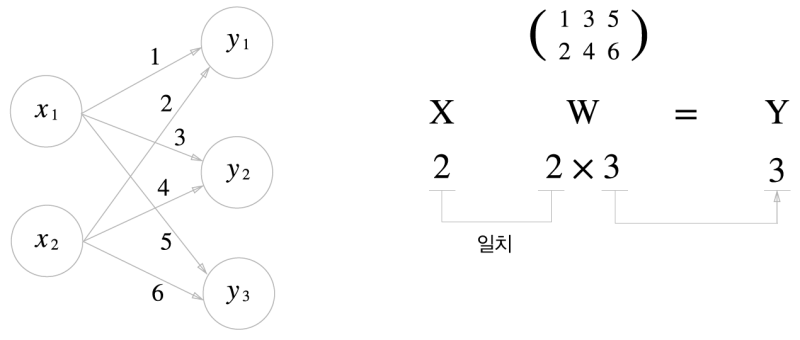

In [7]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])

Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 4. 3층 신경망 구현하기
$${a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)}}$$
여기서 행렬의 곱을 이용하면 1층의 가중치 부분을 간소화할 수 있다.
$${A^{(1)} = XW^{(1)} + B^{(1)}}$$
행렬 ${A^{(1)}, X, W^{(1)}, B^{(1)}}$는 각각 다음과 같다. \
$A^{(1)} = (a_1^{(1)}, a_2^{(1)}, a_3^{(1)}) , X = (x_1, x_2),
B^{(1)} = (b_1^{(1)}, b_2^{(1)}, b_3^{(1)}) $
$
W^{(1)} = \begin{pmatrix}
b_1^{(1)} & b_2^{(1)} & b_3^{(1)} \\
b_4^{(1)} & b_5^{(1)} & b_6^{(1)}
\end{pmatrix}
$

이를 전체로 표현하면 다음과 같다.


In [11]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([[0.1, 0.2, 0.3]])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([[0.1, 0.2]])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])

    return network

def identity_function(x):
    return x

def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)


[[0.31682708 0.69627909]]


## 5. 출력층 설계하기
신경망은 분류와 회귀 모두에 이용할 수 있다. 어떤 문제냐에 따라 사용하는 활성화 함수가 달라지게 되는데 일반적으로 회귀에는 항등함수를 분류에는 소프트맥스 함수를 사용한다.
### 항등함수와 소프트맥스 함수 구현하기
- 항등 함수
  - 입력을 그대로 출력한다.
  - 출력층에서도 항등 함수를 사용하면 입력 신호가 그대로 출력 신호가 된다.

  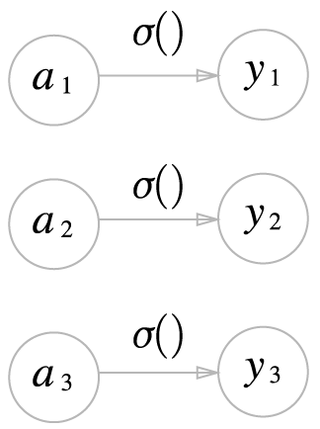
- 소프트맥스 함수
$$y_k = \frac{\exp(a_k)} {\sum_{i=1}^{n}\exp(a_i)}$$
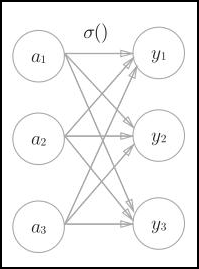

### 소프트맥스 함수 구현 시 주의점
소프트맥스 함수는 지수 함수를 사용한다. 지수 함수는 쉽게 아주 큰 값을 내뱉게 되는데 이 값을 나눗셈을 하게되면 결과 수치가 불안정해진다. 이를 위해 C라는 임의의 정수를 분자와 분모 양쪽에 곱해줌으로서 결과는 바뀌지 않으면서 오버플로를 예방한다.
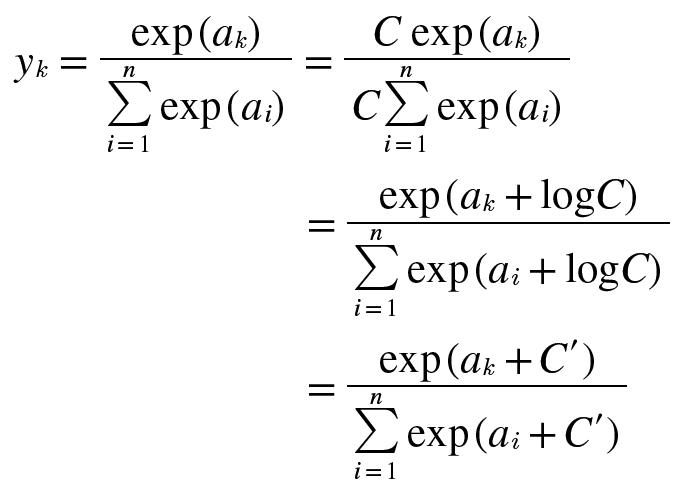

In [12]:
a = np.array([1010,1000,990])
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### 소프트맥스 함수의 특징

In [13]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이고 소프트맥스 함수 출력의 총합은 1이다. 이 함수를 통해 문제를 확률적으롤 대응할 수 있게 된다.

## 6. 손글씨 숫자 인식

In [16]:
# coding: utf-8
import sys
import os
from mnist import load_mnist  # mnist.py 파일에서 load_mnist 함수를 제대로 정의해야 합니다.
import numpy as np
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)


5
(784,)
(28, 28)


In [20]:
# coding: utf-8
import sys
import os
import numpy as np
import pickle
from mnist import load_mnist
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정


def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)

    return network

def identity_function(x):
    return x

def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y



In [22]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352


정규화: 데이터를 특정 범위로 변환하는 처리
전처리: 신경망의 입력 데이터에 특정 변환을 가하는 것

### 배치 처리
배치: 하나로 묶은 입력 데이터. 이미지가 다발로 묶여있는 것을 의미한다.

In [24]:
x, t = get_data()
network = init_network()

batch_size = 100 #100개 단위로 배치 비교
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352
